In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import spearmanr
import ast
from scipy.stats import kstest
import matplotlib
matplotlib.rcParams.update({'font.size': 9})
cm = 1/2.54

In [2]:
out = r"C:\Users\Maciek\Documents\Studia\Magisterka\Images"
model_name = "LSTM"
task = "Eraser"

In [3]:
# Method used to decode filename of model into balancing method, imbalance %, model name, and model id returned in an array
def get_method_and_percentage(name):
    string = "_".join(name.split("_")[:-1])
    percentage = ""
    perc = 0
    for i in range(len(string)):
        if string[i].isdigit():
            perc = i
            percentage += string[i]
        elif perc>0:
            break
    perc+=2 if len(percentage)>0 else 0
    method = ""
    for i in range(perc, len(string)):
        if string[i].isdigit():
            model_id = string[i]
        else:
            method += string[i]
    method = "_".join(method.split("_")[:-1])
    model = name.split("_")[-1][:-4]
    model_id = name.split("_")[-2].split(".")[0]
    return [method, percentage, model, model_id]



if task == "Amazon":
    df = pd.read_csv(fr"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_amazon_{model_name}.csv")
else:
    df = pd.read_csv(fr"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_final_{model_name}.csv")

# for i in range(2,5):
#     df = pd.concat([df, pd.read_csv(f"XAI_results{i}.csv")])
pd.set_option('display.width', 1000)

df2=df
name = pd.DataFrame(list(df["model"].map(lambda x:get_method_and_percentage(x))))
name.columns = ["Balancing method", "Imbalance %", "Model name", "Model ID"]
df = pd.concat([name, df[df.columns[2:]]], axis=1)
df = df.sort_values(["id", "Imbalance %", "Model ID", "Balancing method", "Model name"])
df.columns = [str(col).replace("eval_", "") for col in df.columns]

df = df[df["Balancing method"]!="amazon_review"]
df


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Contextual_word_embedding'),
  Text(1, 0, 'LLama'),
  Text(2, 0, 'LLama_complex'),
  Text(3, 0, 'ROS'),
  Text(4, 0, 'Synonym replacement'),
  Text(5, 0, 'paraphrase'),
  Text(6, 0, 'Spelling_mistake'),
  Text(7, 0, 'original'),
  Text(8, 0, 'imbalanced'),
  Text(9, 0, 'Translation'),
  Text(10, 0, 'Summarization')])

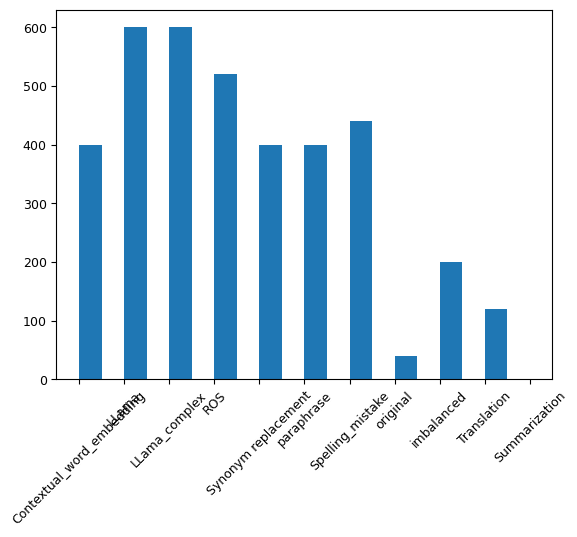

In [ ]:
plt.hist(df["Balancing method"], width=0.5)
plt.xticks(rotation=45)

In [ ]:
df_tm = df
df_tm["test"]=df["words_sentence"].apply(lambda x:len(ast.literal_eval(x)))
df_tm.sort_values(["test"])

,Balancing method,Imbalance %,Model name,Model ID,model,id,words_sentence,lime_sentence,words_word,lime_word,test
3564,paraphrase,20,LSTM,2,eraser_movie_20_paraphrase_2_LSTM.obj,4,"['it', 's', 'a', 'good', 'thing', 'most', 'ani...","[0.002023740263560764, -0.02009454741433867, -...",['31st' 'a' 'about' 'action' 'aliens' 'all' 'a...,"[-0.003938552414539869, -0.0034148267320514695...",227
2204,Spelling_mistake,10,LSTM,4,eraser_movie_10_Spelling_mistake_4_LSTM.obj,4,"['it', 's', 'a', 'good', 'thing', 'most', 'ani...","[-0.01779086266560007, -0.2950195294796705, 0....",['31st' 'a' 'about' 'action' 'aliens' 'all' 'a...,"[0.005112852500778017, 0.04442534981404367, 0....",227
2844,Synonym replacement,10,LSTM,4,eraser_movie_10_Synonym replacement_4_LSTM.obj,4,"['it', 's', 'a', 'good', 'thing', 'most', 'ani...","[-0.0017379174883938343, -0.43108040307275375,...",['31st' 'a' 'about' 'action' 'aliens' 'all' 'a...,"[0.009664683873917796, 0.01346856158146872, 0....",227
1164,original,100,LSTM,0,eraser_movie_100_original_0_LSTM.obj,4,"['it', 's', 'a', 'good', 'thing', 'most', 'ani...","[-0.02338197195754857, -0.11893358717717974, 0...",['31st' 'a' 'about' 'action' 'aliens' 'all' 'a...,"[-0.006198387327639146, 0.015386710294549001, ...",227
284,Contextual_word_embedding,20,LSTM,0,eraser_movie_20_Contextual_word_embedding_0_LS...,4,"['it', 's', 'a', 'good', 'thing', 'most', 'ani...","[2.1284603600689106e-05, -0.02416431020863628,...",['31st' 'a' 'about' 'action' 'aliens' 'all' 'a...,"[0.0033598267654566267, -0.009067364355618668,...",227
...,...,...,...,...,...,...,...,...,...,...,...
3466,paraphrase,50,LSTM,0,eraser_movie_50_paraphrase_0_LSTM.obj,26,"['star', 'wars', 'episode', 'i', 'the', 'phant...","[0, -0.00937867620693674, 0, 0.008242117261440...",['131' '1999' '20th' 'a' 'about' 'abysmally' '...,"[0.01189450693730182, 0.007696830372996452, 0....",1503
2666,Contextual_word_embedding,50,LSTM,1,eraser_movie_50_Contextual_word_embedding_1_LS...,26,"['star', 'wars', 'episode', 'i', 'the', 'phant...","[0.015836380465198974, 0, 0, 0.033684327810058...",['131' '1999' '20th' 'a' 'about' 'abysmally' '...,"[0.0074404164295211305, 0.009185581690424396, ...",1503
106,LLama,50,LSTM,1,erqaser_movie_50_LLama_1_LSTM.obj,26,"['star', 'wars', 'episode', 'i', 'the', 'phant...","[0.07014110396738357, 0.018724365797146755, -0...",['131' '1999' '20th' 'a' 'about' 'abysmally' '...,"[0.038682755762366364, 0.01933036471813474, -0...",1503
2706,paraphrase,20,LSTM,4,eraser_movie_20_paraphrase_4_LSTM.obj,26,"['star', 'wars', 'episode', 'i', 'the', 'phant...","[0, -0.047198102480601606, 0, 0.07247173892475...",['131' '1999' '20th' 'a' 'about' 'abysmally' '...,"[0.009942000764984995, 0.0155512545391064, -0....",1503


_________________ original _________________
it s a good thing most animated sci fi movies come from japan because titan a e is proof that hollywood does n t have a clue 
how to do it i do n t know what this film is supposed to be about from what i can tell it s about a young man named kale who s one of the 
last survivors of earth in the early 31st century who unknowingly possesses the key to saving and re generating what is left 
of the human race that s a fine premise for an action packed sci fi animated movie but there s no payoff the story takes the 
main characters all over the galaxy in their search for a legendary ship that the evil dredge aliens want to destroy for no 
apparent reason so in the process we get a lot of spaceship fights fistfights blaster fights and more double crosses than you can 
shake a stick at there s so much pointless sci fi banterit s too much to take the galaxy here is a total rip off of the star wars 
universe the creators do n t bother filling in the 

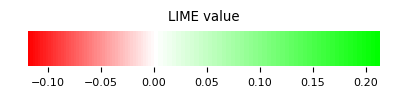

_________________ Contextual_word_embedding _________________
it s a good thing most animated sci fi movies come from japan because titan a e is proof that hollywood does n t have a clue 
how to do it i do n t know what this film is supposed to be about from what i can tell it s about a young man named kale who s one of the 
last survivors of earth in the early 31st century who unknowingly possesses the key to saving and re generating what is left 
of the human race that s a fine premise for an action packed sci fi animated movie but there s no payoff the story takes the 
main characters all over the galaxy in their search for a legendary ship that the evil dredge aliens want to destroy for no 
apparent reason so in the process we get a lot of spaceship fights fistfights blaster fights and more double crosses than you can 
shake a stick at there s so much pointless sci fi banterit s too much to take the galaxy here is a total rip off of the star wars 
universe the creators do n t bothe

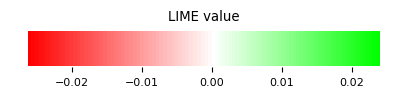

_________________ LLama_complex _________________
it s a good thing most animated sci fi movies come from japan because titan a e is proof that hollywood does n t have a clue 
how to do it i do n t know what this film is supposed to be about from what i can tell it s about a young man named kale who s one of the 
last survivors of earth in the early 31st century who unknowingly possesses the key to saving and re generating what is left 
of the human race that s a fine premise for an action packed sci fi animated movie but there s no payoff the story takes the 
main characters all over the galaxy in their search for a legendary ship that the evil dredge aliens want to destroy for no 
apparent reason so in the process we get a lot of spaceship fights fistfights blaster fights and more double crosses than you can 
shake a stick at there s so much pointless sci fi banterit s too much to take the galaxy here is a total rip off of the star wars 
universe the creators do n t bother filling in

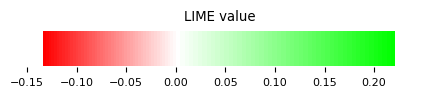

_________________ Spelling_mistake _________________
it s a good thing most animated sci fi movies come from japan because titan a e is proof that hollywood does n t have a clue 
how to do it i do n t know what this film is supposed to be about from what i can tell it s about a young man named kale who s one of the 
last survivors of earth in the early 31st century who unknowingly possesses the key to saving and re generating what is left 
of the human race that s a fine premise for an action packed sci fi animated movie but there s no payoff the story takes the 
main characters all over the galaxy in their search for a legendary ship that the evil dredge aliens want to destroy for no 
apparent reason so in the process we get a lot of spaceship fights fistfights blaster fights and more double crosses than you can 
shake a stick at there s so much pointless sci fi banterit s too much to take the galaxy here is a total rip off of the star wars 
universe the creators do n t bother filling

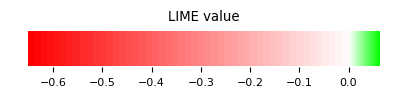

_________________ Synonym replacement _________________
it s a good thing most animated sci fi movies come from japan because titan a e is proof that hollywood does n t have a clue 
how to do it i do n t know what this film is supposed to be about from what i can tell it s about a young man named kale who s one of the 
last survivors of earth in the early 31st century who unknowingly possesses the key to saving and re generating what is left 
of the human race that s a fine premise for an action packed sci fi animated movie but there s no payoff the story takes the 
main characters all over the galaxy in their search for a legendary ship that the evil dredge aliens want to destroy for no 
apparent reason so in the process we get a lot of spaceship fights fistfights blaster fights and more double crosses than you can 
shake a stick at there s so much pointless sci fi banterit s too much to take the galaxy here is a total rip off of the star wars 
universe the creators do n t bother fill

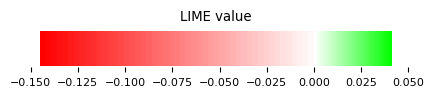

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)  
def color_output(words, explanations):
    coloring_range = ( np.min(explanations), np.max(explanations))
    l=0
    for j in range(len(words)):
        if explanations[j]<0:
            perc = explanations[j]/coloring_range[0]
            r, g, b = 255,int(-255*perc+255),int(-255*perc+255)
        else:
            perc = explanations[j]/coloring_range[1]
            r, g, b = int(-255*perc+255),255,int(-255*perc+255)
        l+=len(words[j])
        if l>100:
            print("\n",end="")
            l=0
        print(f'\033[38;2;{r};{g};{b}m\033[48;2;0;0;0m{words[j]} \033[0m', end="") 
    
    n = 50
    lin_1 = np.linspace(coloring_range[0],0,n)
    diff_1 = lin_1[1]-lin_1[0]
    lin_2 = np.linspace(0, coloring_range[1],n)
    diff_2 = lin_2[1]-lin_2[0]
    # plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(5,1/2))
    plt.plot()

    for i in range(n):
        perc = (lin_1[0]-lin_1[i])/coloring_range[0]
        rect = patches.Rectangle((coloring_range[0]-lin_1[i], 0), diff_1, 1, facecolor=(1,int(-255*perc+255)/255,int(-255*perc+255)/255))
        ax.add_patch(rect)
        perc = (lin_2[i])/coloring_range[1]
        rect = patches.Rectangle((lin_2[i], 0), diff_2, 1, facecolor=(int(-255*perc+255)/255,1,int(-255*perc+255)/255))
        ax.add_patch(rect)
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.title("LIME value")
    plt.show()
    
df_tmp = df[(df["id"]==4)&((df["Imbalance %"].astype(int)==20)| (df["Imbalance %"].astype(int)==100))&(df["Model ID"].astype(int)==0)&(df["Balancing method"]!="LLama")]
tmp = 5 if task=="Amazon" else 6
for val in df_tmp.values:
    print(f"_________________ {val[0]} _________________")    
    color_output(ast.literal_eval(val[tmp]), ast.literal_eval(val[tmp+1]))

In [ ]:
# Method used to calculate p_values from wilcoxon-signed rank test between two explanations
def get_p_values(df, lime="lime_sentence"):
    results = []
    
    # Selecting model trained on original data for comparison
    original = df[df["Balancing method"]=="Original"]

    # Looping through imbalance % model id balancing method and instances
    for imbalance in np.unique(df["Imbalance %"]):
        for model_id in np.unique(df["Model ID"]):
            # Selecting model trained on imbalanced data for comparison
            df_tmp = df[(df["Imbalance %"]==imbalance)&(df["Model ID"]==model_id)&(df["Balancing method"]!="Original")]
            imbalanced = df_tmp[df_tmp["Balancing method"]=="Imbalanced"]
            # Filtering models based on balanced datasets
            other_methods = df_tmp[df_tmp["Balancing method"]!="Imbalanced"]
            for method in np.unique(other_methods["Balancing method"]):
                for i in np.unique(other_methods.id):
                    # Saving basic model identification
                    res = {}
                    res["Model ID"] = model_id
                    res["Imbalance %"] = imbalance
                    res["Balancing method"] = method
                    res["id"] = i
                    # Comparing xai from original model and xai from balanced model
                    df_tmp = other_methods[other_methods["Balancing method"]==method]
                    x1 = ast.literal_eval(df_tmp[df_tmp.id==i][lime].values[0])
                    x2 = ast.literal_eval(original[original.id==i][lime].values[0])
                    res["original"] = stats.wilcoxon(x1, x2)[1]
                    res["spearman_original"] = spearmanr(x1, x2)[0]
                    res["normality_original"] = kstest(np.array(x1)-np.array(x2), 'norm')[1]
                    # Comparing xai from imbalanced model and xai from balanced model if imbalanced model was not bad (acc>0.6 & f1!=0)
                    if len(imbalanced)>0:
                        x3 = ast.literal_eval(imbalanced[imbalanced.id==i][lime].values[0])
                        res["imbalanced"] = stats.wilcoxon(x1, x3)[1]
                        res["spearman_imbalanced"] = spearmanr(x1, x3)[0]
                        res["normality_imbalanced"] = kstest(np.array(x1)-np.array(x2), 'norm')[1]
                    results.append(res)
    return pd.DataFrame(results)

# Method used to join results and metrics tables
def add_metrics(results, metrics):
    
    # Changing column types to get agreement between tables
    results['Model ID'] = results['Model ID'].astype(str)
    metrics['Model ID'] = metrics['Model ID'].astype(str)
    results['Imbalance %'] = results['Imbalance %'].astype(str)
    metrics['Imbalance %'] = metrics['Imbalance %'].astype(str)
    metrics["Balancing method"] = metrics["Balancing method"].apply(lambda x: x[0].upper() + x[1:].lower().replace("_"," ")) # Capitalizing balancing method
    
    # Merging tables
    final = results.merge(metrics, on=['Model ID', 'Imbalance %', 'Balancing method'], how='left')
    
    # Removal of bad models that slipped through initial filtering due to a spelling mistake
    return final[(final["auc"]>=0.6) & (final["f1"]!=0)]


# Method used to preprocess the dataset and get p_values for all models
def preprocess_dataset(df):
       
    # Adding additionall columns based on model name
    name = pd.DataFrame(list(df["model"].map(lambda x:get_method_and_percentage(x))))
    name.columns = ["Balancing method", "Imbalance %", "Model name", "Model ID"]
    name["Balancing method"] = name["Balancing method"].apply(lambda x: x[0].upper() + x[1:].lower().replace("_"," ")) # Capitalizing balancing method
    df = pd.concat([name, df[df.columns[2:]]], axis=1)
    df = df.sort_values(["id", "Imbalance %", "Model ID", "Balancing method", "Model name"])
    df.columns = [str(col).replace("eval_", "") for col in df.columns]
        
        
    final_sentence = []
    final_word = []
    for mn in ["SVM", "LSTM", "DistilBERT"]:
        if task == "Amazon":
            metrics = pd.read_csv(f"amazon-review_{mn}.csv")
        else:
            metrics = pd.read_csv(f"nlpaug_{mn}.csv")
        df_tmp = df[df["Model name"]==mn]
        
        # Filtering out models that were not supposed to be in the dataset
        df_tmp = df_tmp[df_tmp["Balancing method"]!="Amazon review"]
        results_sentence = get_p_values(df_tmp, lime="lime_sentence")
        results_word = get_p_values(df_tmp, lime="lime_word")
        final_sentence.append(add_metrics(results_sentence, metrics[metrics["Model name"]==mn]))
        final_word.append(add_metrics(results_word, metrics[metrics["Model name"]==mn]))
    
    return pd.concat(final_sentence), pd.concat(final_word)





In [ ]:
# Loading the dataset with results from XAI methods
if task == "Amazon":
    path = r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_amazon_"
else:
    path = r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_final_"
 
df = pd.concat([pd.read_csv(path+f"{model}.csv") for model in ["SVM", "LSTM", "DistilBERT"]])
df.reset_index(drop=True, inplace=True)
display(df)

# Preprocessing the dataset and getting p_values for all models    
final_sentence, final_word = preprocess_dataset(df)
display(final_sentence)
final_sentence.shape

,Unnamed: 0.1,Unnamed: 0,model,id,words_sentence,lime_sentence,words_word,lime_word
0,0,0,eraser_movie_20_imbalanced_1_SVM.obj,0,"['there', 'may', 'not', 'be', 'a', 'critic', '...","[-0.0023510436284893874, -0.001149116990255253...",['a' 'about' 'accidental' 'act' 'action' 'affe...,"[0.0008153790846635893, -0.0001337514776326615..."
1,1,1,eraser_movie_20_imbalanced_1_SVM.obj,1,"['renee', 'zellweger', 'stars', 'as', 'sonia',...","[-0.0008797237142304188, 0.0008984306385663214...",['1991' '1997' '21' 'a' 'about' 'acting' 'adeq...,"[-0.0013887081663881433, 0.0029263515487032345..."
2,2,2,eraser_movie_20_imbalanced_1_SVM.obj,2,"['there', 're', 'so', 'many', 'things', 'to', ...","[-0.01756281249605644, -0.0013797640438211855,...",['20' '3' '4' '99' 'a' 'about' 'acting' 'actua...,"[0.007120218003259248, -0.007146497366048108, ..."
3,3,3,eraser_movie_20_imbalanced_1_SVM.obj,3,"['do', 'n', 't', 'let', 'this', 'movie', 'fool...","[-0.02486473749378378, -0.002608375949646954, ...",['a' 'about' 'accolade' 'achievement' 'again' ...,"[0.0028418046373063187, -0.0036055113211421476..."
4,4,4,eraser_movie_20_imbalanced_1_SVM.obj,4,"['it', 's', 'a', 'good', 'thing', 'most', 'ani...","[-0.0016676413159903399, -2.265893067244543e-0...",['31st' 'a' 'about' 'action' 'aliens' 'all' 'a...,"[-0.0045547639473927995, 0.0005126824509492028..."
...,...,...,...,...,...,...,...,...
13835,1595,1595,eraser_movie_10_Contextual_word_embedding_3_Di...,35,"['the', 'plot', 'of', 'big', 'momma', 's', 'ho...","[-0.029835558249404176, -0.041857015914193385,...",['90' '_' '_and' 'a' 'about' 'absolutely' 'acc...,"[-0.020796777246296694, -0.0144997436856854, 0..."
13836,1596,1596,eraser_movie_10_Contextual_word_embedding_3_Di...,36,"['starring', 'william', 'baldwin', 'cindy', 'c...","[0.04080479710871758, -0.022547427839991706, 0...",['a' 'ability' 'about' 'acted' 'acting' 'actor...,"[0.046588454637025906, 0.04822721028970748, 0...."
13837,1597,1597,eraser_movie_10_Contextual_word_embedding_3_Di...,37,"['take', 'a', 'look', 'at', 'the', 'following'...","[0.00826998838368842, -0.02240867720370128, -0...",['1' '20' '25' 'a' 'academy3' 'actors' 'allen'...,"[0.04033952731447936, -0.001563022358366624, 0..."
13838,1598,1598,eraser_movie_10_Contextual_word_embedding_3_Di...,38,"['synopsis', 'a', 'maniac', 'crazed', 'by', 'v...","[-0.03918655046479479, 0.011104326074841684, 0...",['2007' '76' 'a' 'abandoned' 'able' 'about' 'a...,"[-0.0450886705264764, -0.05509696744775729, 0...."


,Model ID,Imbalance %,Balancing method,id,original,spearman_original,normality_original,imbalanced,spearman_imbalanced,normality_imbalanced,...,Model name,acc,f1,precision,recall,mcc,auc,spearman,spearman_pval,loss
0,0,10,Llama,0,0.000045,0.502280,2.663103e-104,2.043570e-07,0.598325,2.663103e-104,...,SVM,0.54,0.148148,1.000000,0.08,0.204124,0.7938,0.966570,5.248116e-06,NaN
1,0,10,Llama,1,0.003033,0.595077,2.554212e-68,1.076253e-10,0.350683,2.554212e-68,...,SVM,0.54,0.148148,1.000000,0.08,0.204124,0.7938,0.966570,5.248116e-06,NaN
2,0,10,Llama,2,0.000017,0.576552,1.539582e-148,3.872738e-01,0.644914,1.539582e-148,...,SVM,0.54,0.148148,1.000000,0.08,0.204124,0.7938,0.966570,5.248116e-06,NaN
3,0,10,Llama,3,0.000020,0.656390,2.387624e-66,2.164247e-05,0.716727,2.387624e-66,...,SVM,0.54,0.148148,1.000000,0.08,0.204124,0.7938,0.966570,5.248116e-06,NaN
4,0,10,Llama,4,0.005084,0.687676,6.047580e-49,5.665993e-05,0.701503,6.047580e-49,...,SVM,0.54,0.148148,1.000000,0.08,0.204124,0.7938,0.966570,5.248116e-06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4,50,Translation,35,0.030321,0.701240,2.276888e-188,1.807865e-01,0.762244,2.276888e-188,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306
4596,4,50,Translation,36,0.495987,0.394999,3.681430e-112,5.333647e-02,0.736688,3.681430e-112,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306
4597,4,50,Translation,37,0.952923,0.359607,3.075115e-100,1.290142e-03,0.581215,3.075115e-100,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306
4598,4,50,Translation,38,0.476619,0.518378,5.566191e-112,1.116367e-02,0.716444,5.566191e-112,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306


(12400, 22)

# Are differences between lime normally distributed?

In [ ]:
print("Sentence")
df_tmp = final_sentence[["normality_original", "normality_imbalanced", "f1"]].dropna()

df_tmp = df_tmp.drop("f1", axis=1)
# Calculating descriptive statistics

display(pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                    "median": np.round(np.median(df_tmp, axis=0), 4),
                    "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) }))

print("Word")
df_tmp = final_sentence[["normality_original", "normality_imbalanced", "f1"]].dropna()

df_tmp = df_tmp.drop("f1", axis=1)
# Calculating descriptive statistics
pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                    "median": np.round(np.median(df_tmp, axis=0), 4),
                    "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) })

Sentence


,mean,median,rejection rate
normality_original,0.0,0.0,1.0
normality_imbalanced,0.0,0.0,1.0


Word


,mean,median,rejection rate
normality_original,0.0,0.0,1.0
normality_imbalanced,0.0,0.0,1.0


# Are balanced models more similar to original or imbalanced model?

In [ ]:
# Method used to calculate descriptive statistics of p-values comparing XAI of balanced models to XAI of original and imbalanced models
def similarity_balanced_imbalanced(final_sentence, final_word, threshold = None, spearman=False, good=True):
    def get_similarity(final, threshold, spearman, good):
        # Selecting columns based on the type of test
        if 1-spearman:
            df_tmp = final[["original", "imbalanced", "f1"]].dropna()
        else:
            df_tmp = final[["spearman_original", "spearman_imbalanced", "f1"]].dropna()
        
        # Filtering models if threshold was provided
        if threshold != None:
            df_tmp1 = df_tmp[df_tmp.f1>threshold]
            df_tmp1 = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean good": np.round(np.mean(df_tmp1, axis=0), 4),
                                "median good": np.round(np.median(df_tmp1, axis=0), 4),
                                "rejection rate good": np.round(np.mean(df_tmp1<0.05, axis=0), 4) })
            df_tmp = df_tmp[df_tmp.f1<=threshold]
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.concat([res,pd.DataFrame(data={"mean bad": np.round(np.mean(df_tmp, axis=0), 4),
                                "median bad": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate bad": np.round(np.mean(df_tmp<0.05, axis=0), 4) })], axis=1)
        else:
            # Calculating descriptive statistics
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                                "median": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) })
        # Clean up
        if spearman and threshold==None:
            res=res.drop(["rejection rate"], axis=1)
        elif spearman:
            res=res.drop(["rejection rate good"], axis=1).drop(["rejection rate bad"], axis=1)
        return res
    
    # Method used to get latex table from results
    def get_latex(results):
        # Clean up and column reordering
        results.reset_index(inplace=True)
        results = results[list(results.columns[1:3])+["index"]+list(results.columns[3:])]
        results = results.rename(columns={"index":"compared model"})
        
        # Latex table generation
        l = results.reset_index(drop=True).astype(str).to_latex(index=False)
        
        # Fixing latex table formatting
        l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", " ")
        l = "\\\\\hline\noriginal".join(l.split("\\\\\noriginal"))
        
        # Creating multirow for models and levels
        for mn in ["SVM", "LSTM", "DistilBERT"]:
            l = l.split(mn)[0]+"\hline\multirow{4}{*}{"+mn+"}"+" ".join(l.split(mn)[1:])
            
        l_tmp = l
        for level in ["sentence", "word"]:
            i=0
            for ls in l_tmp.split(level):
                if i==0:
                    l_tmp = ""
                if i%2==1:
                    l_tmp += "\multirow{2}{*}{"+level+"}"
                l_tmp += ls
                i+=1  
        l = l_tmp.replace("& \multirow{2}{*}{word}","\cline{2-6} & \multirow{2}{*}{word}")
        print(l)
    
    # Calculating descriptive statistics for explanations oin word and sentence level for each model
    results = []
    for model_name in ["SVM", "LSTM", "DistilBERT"]:
        final_sentence_tmp = final_sentence[final_sentence["Model name"]==model_name]
        final_word_tmp = final_word[final_word["Model name"]==model_name]
        res = pd.concat([get_similarity(final_sentence_tmp, threshold, spearman, good), get_similarity(final_word_tmp, threshold, spearman, good)])
        res["level"] = ["sentence", "sentence", "word", "word"]
        res["model"] = model_name
        res = res[["model", "level"]+list(res.columns)[:-2]]
        results.append(res)
    results = pd.concat(results)    
    
    get_latex(results)
    display(results)
    
    



similarity_balanced_imbalanced(final_sentence,final_word)


\begin{tabular}{|llllll|}\hline
model & level & compared model & mean & median & rejection rate \\\hline
\hline\multirow{4}{*}{SVM} & \multirow{2}{*}{sentence} & original & 0.103 & 0.0011 & 0.7276 \\
  &  & imbalanced & 0.0805 & 0.0 & 0.789 \\
  \cline{2-6} & \multirow{2}{*}{word} & original & 0.4143 & 0.3726 & 0.0657 \\
  &  & imbalanced & 0.336 & 0.2552 & 0.1856 \\
\hline\multirow{4}{*}{LSTM} & \multirow{2}{*}{sentence} & original & 0.1539 & 0.0088 & 0.6234 \\
  &  & imbalanced & 0.115 & 0.0011 & 0.7056 \\
  \cline{2-6} & \multirow{2}{*}{word} & original & 0.5825 & 0.5904 & 0.0089 \\
  &  & imbalanced & 0.6002 & 0.6271 & 0.0073 \\
\hline\multirow{4}{*}{DistilBERT} & \multirow{2}{*}{sentence} & original & 0.221 & 0.0707 & 0.4606 \\
  &  & imbalanced & 0.2049 & 0.0452 & 0.5056 \\
  \cline{2-6} & \multirow{2}{*}{word} & original & 0.6415 & 0.6494 & 0.0044 \\
  &  & imbalanced & 0.6068 & 0.6371 & 0.0178 \\\hline
\end{tabular}



,index,model,level,mean,median,rejection rate
0,original,SVM,sentence,0.1030,0.0011,0.7276
1,imbalanced,SVM,sentence,0.0805,0.0000,0.7890
2,original,SVM,word,0.4143,0.3726,0.0657
3,imbalanced,SVM,word,0.3360,0.2552,0.1856
4,original,LSTM,sentence,0.1539,0.0088,0.6234
5,imbalanced,LSTM,sentence,0.1150,0.0011,0.7056
6,original,LSTM,word,0.5825,0.5904,0.0089
7,imbalanced,LSTM,word,0.6002,0.6271,0.0073
8,original,DistilBERT,sentence,0.2210,0.0707,0.4606
9,imbalanced,DistilBERT,sentence,0.2049,0.0452,0.5056


### Spearman

In [ ]:
similarity_balanced_imbalanced(final_sentence, final_word, spearman = True)


\begin{tabular}{|lllll|}\hline
model & level & compared model & mean & median \\\hline
\hline\multirow{4}{*}{SVM} & \multirow{2}{*}{sentence} & spearman\_original & 0.5322 & 0.5376 \\
  &  & spearman\_imbalanced & 0.5504 & 0.5738 \\
  \cline{2-6} & \multirow{2}{*}{word} & spearman\_original & 0.5477 & 0.5524 \\
  &  & spearman\_imbalanced & 0.5674 & 0.5881 \\
\hline\multirow{4}{*}{LSTM} & \multirow{2}{*}{sentence} & spearman\_original & 0.1514 & 0.1581 \\
  &  & spearman\_imbalanced & 0.3583 & 0.3678 \\
  \cline{2-6} & \multirow{2}{*}{word} & spearman\_original & 0.1163 & 0.1076 \\
  &  & spearman\_imbalanced & 0.3242 & 0.3181 \\
\hline\multirow{4}{*}{DistilBERT} & \multirow{2}{*}{sentence} & spearman\_original & 0.4642 & 0.4861 \\
  &  & spearman\_imbalanced & 0.5254 & 0.5559 \\
  \cline{2-6} & \multirow{2}{*}{word} & spearman\_original & 0.4348 & 0.4613 \\
  &  & spearman\_imbalanced & 0.4984 & 0.5312 \\\hline
\end{tabular}



,index,model,level,mean,median
0,spearman_original,SVM,sentence,0.5322,0.5376
1,spearman_imbalanced,SVM,sentence,0.5504,0.5738
2,spearman_original,SVM,word,0.5477,0.5524
3,spearman_imbalanced,SVM,word,0.5674,0.5881
4,spearman_original,LSTM,sentence,0.1514,0.1581
5,spearman_imbalanced,LSTM,sentence,0.3583,0.3678
6,spearman_original,LSTM,word,0.1163,0.1076
7,spearman_imbalanced,LSTM,word,0.3242,0.3181
8,spearman_original,DistilBERT,sentence,0.4642,0.4861
9,spearman_imbalanced,DistilBERT,sentence,0.5254,0.5559


# Which method results in models the most similar to original model?

In [ ]:
def apply_style(text, row, col, fun=lambda x:r"\textbf{"+x+"}"):
    row_val = text.split("////")[row]
    print(row)
    col_val = row_val.split("&")[col]
    print(col)
    row = "&".join(row.split("&")[:col]) + "&" + fun(col_val) 
    if col+1<len(row_val.split("&")):
        row += "&"+"&".join(row_val.split("&")[col+1:])
    result = "////".join(text.split("////")[:row]) + "////" + row + "////" + "////".join(text.split("////")[row+1:])
    return result

In [ ]:
# Method used to calculate descriptive statistics of p-values comparing XAI of balanced models to XAI of original model with regard to all balancing methods
def similarity_balancing_methods(final, threshold = None, spearman = False, pr = True):
        def get_result_table(df_tmp, good=True):
            df_tmp = df_tmp.drop("f1", axis=1)
            res = []
            # Calculating descriptive statistics
            for method in np.unique(df_tmp["Balancing method"]):
                df_ = df_tmp[df_tmp["Balancing method"]==method]["original"] if 1-spearman else df_tmp[df_tmp["Balancing method"]==method]["spearman_original"]
                res.append([method, np.round(np.mean(df_),4), np.round(np.median(df_),4), np.round(np.mean(df_<0.05),4)])
            r = pd.DataFrame(res)
            r.columns = ["Balancing method", "mean", "median", "rejection rate"]
            if spearman:
                r=r.drop(["rejection rate"], axis=1)
            r.index = r["Balancing method"]
            r = r.drop(["Balancing method"], axis=1)
            if threshold != None:
                if good:
                    r.columns = [col+" good" for col in r.columns]
                else:
                    r.columns = [col+" bad" for col in r.columns]
            return r
            
        
        # Filtering models if threshold was provided
        df_tmp = final[["Balancing method", "original", "f1"]].dropna() if 1-spearman else final[["Balancing method", "spearman_original", "f1"]].dropna()
        if threshold != None:
            r = pd.concat([get_result_table(df_tmp[df_tmp.f1>threshold], True), get_result_table(df_tmp[df_tmp.f1<=threshold], False)], axis=1)
        else:
            r = get_result_table(df_tmp)
        return r      

# Method used to create Latex table of descriptive statistics of p-values comparing XAI of balanced models to XAI of original model with regard to all balancing methods
def get_similarity_table(final_sentence, final_word, threshold = None, spearman = False, pr = True):
    # Calculating descriptive statistics for explanations on word and sentence level for each model
    r1 = similarity_balancing_methods(final_sentence, threshold, spearman, pr)
    r2 = similarity_balancing_methods(final_word, threshold, spearman, pr) 
    r1.columns = [c+"_sen" for c in r1.columns]
    r2.columns = [c+"_wor" for c in r2.columns]
    r=r1.join(r2)
    if pr: 
        display(r)
        
    # Creating latex table
    l = r.reset_index().astype(str).to_latex(index=False)
    l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", " ")
    
    replacement_text = '\\begin{tabular}{|l|lll|lll|}\\hline\nBalancing method &  \multicolumn{'
    replacement_text += "2" if spearman else "3"
    replacement_text += '}{|c|}{Sentence}   &   \multicolumn{'
    replacement_text += "2" if spearman else "3"
    replacement_text += '}{|c|}{Word}  \\\\\n  & mean  & median  & rejection rate  & mean  & median  & rejection rate '

    l =l.replace('\\begin{tabular}{|lllllll|}\\hline\nBalancing method & mean\_sen & median\_sen & rejection rate\_sen & mean\_wor & median\_wor & rejection rate\_wor', replacement_text)
    
    print(l)   

# Calculating descriptive statistics of p-values comparing XAI of balanced models to XAI of original model with regard to all balancing methods
for model_name in ["SVM", "LSTM", "DistilBERT"]:
    print("============================================== "+model_name+" ==============================================")
    get_similarity_table(final_sentence[final_sentence["Model name"]==model_name], final_word[final_word["Model name"]==model_name])

print()


============================================== SVM ==============================================


,mean_sen,median_sen,rejection rate_sen,mean_wor,median_wor,rejection rate_wor
Balancing method,,,,,,
Contextual word embedding,0.1647,0.0299,0.5731,0.3181,0.2255,0.0865
Llama,0.0735,0.0001,0.8350,0.5353,0.5529,0.0333
Llama complex,0.0570,0.0000,0.8517,0.5434,0.5781,0.0350
Paraphrase,0.0532,0.0005,0.8017,0.4109,0.3583,0.0517
Ros,0.1735,0.0374,0.5519,0.3140,0.2049,0.0923
Spelling mistake,0.1726,0.0341,0.5446,0.3211,0.2097,0.0946
Summarization,0.0001,0.0000,1.0000,0.5327,0.5457,0.0423
Synonym replacement,0.1825,0.0388,0.5250,0.3200,0.2312,0.0846
Translation,0.0003,0.0000,1.0000,0.3827,0.3235,0.1050


\begin{tabular}{|l|lll|lll|}\hline
Balancing method &  \multicolumn{3}{|c|}{Sentence}   &   \multicolumn{3}{|c|}{Word}  \\
  & mean  & median  & rejection rate  & mean  & median  & rejection rate  \\\hline
Contextual word embedding & 0.1647 & 0.0299 & 0.5731 & 0.3181 & 0.2255 & 0.0865 \\
Llama & 0.0735 & 0.0001 & 0.835 & 0.5353 & 0.5529 & 0.0333 \\
Llama complex & 0.057 & 0.0 & 0.8517 & 0.5434 & 0.5781 & 0.035 \\
Paraphrase & 0.0532 & 0.0005 & 0.8017 & 0.4109 & 0.3583 & 0.0517 \\
Ros & 0.1735 & 0.0374 & 0.5519 & 0.314 & 0.2049 & 0.0923 \\
Spelling mistake & 0.1726 & 0.0341 & 0.5446 & 0.3211 & 0.2097 & 0.0946 \\
Summarization & 0.0001 & 0.0 & 1.0 & 0.5327 & 0.5457 & 0.0423 \\
Synonym replacement & 0.1825 & 0.0388 & 0.525 & 0.32 & 0.2312 & 0.0846 \\
Translation & 0.0003 & 0.0 & 1.0 & 0.3827 & 0.3235 & 0.105 \\\hline
\end{tabular}

============================================== LSTM ==============================================


,mean_sen,median_sen,rejection rate_sen,mean_wor,median_wor,rejection rate_wor
Balancing method,,,,,,
Contextual word embedding,0.1831,0.0212,0.5750,0.6514,0.6825,0.0000
Llama,0.1108,0.0010,0.7346,0.5904,0.5979,0.0173
Llama complex,0.1098,0.0026,0.7364,0.5905,0.5964,0.0136
Paraphrase,0.1527,0.0090,0.6100,0.6197,0.6516,0.0000
Ros,0.1653,0.0071,0.6308,0.6254,0.6407,0.0058
Spelling mistake,0.1609,0.0175,0.6091,0.5511,0.5554,0.0114
Summarization,0.0397,0.0003,0.8500,0.5124,0.4369,0.0250
Synonym replacement,0.1734,0.0109,0.6025,0.5185,0.5103,0.0450
Translation,0.0801,0.0002,0.8000,0.6333,0.7131,0.0000


\begin{tabular}{|l|lll|lll|}\hline
Balancing method &  \multicolumn{3}{|c|}{Sentence}   &   \multicolumn{3}{|c|}{Word}  \\
  & mean  & median  & rejection rate  & mean  & median  & rejection rate  \\\hline
Contextual word embedding & 0.1831 & 0.0212 & 0.575 & 0.6514 & 0.6825 & 0.0 \\
Llama & 0.1108 & 0.001 & 0.7346 & 0.5904 & 0.5979 & 0.0173 \\
Llama complex & 0.1098 & 0.0026 & 0.7364 & 0.5905 & 0.5964 & 0.0136 \\
Paraphrase & 0.1527 & 0.009 & 0.61 & 0.6197 & 0.6516 & 0.0 \\
Ros & 0.1653 & 0.0071 & 0.6308 & 0.6254 & 0.6407 & 0.0058 \\
Spelling mistake & 0.1609 & 0.0175 & 0.6091 & 0.5511 & 0.5554 & 0.0114 \\
Summarization & 0.0397 & 0.0003 & 0.85 & 0.5124 & 0.4369 & 0.025 \\
Synonym replacement & 0.1734 & 0.0109 & 0.6025 & 0.5185 & 0.5103 & 0.045 \\
Translation & 0.0801 & 0.0002 & 0.8 & 0.6333 & 0.7131 & 0.0 \\\hline
\end{tabular}

============================================== DistilBERT ==============================================


,mean_sen,median_sen,rejection rate_sen,mean_wor,median_wor,rejection rate_wor
Balancing method,,,,,,
Contextual word embedding,0.1789,0.0388,0.5288,0.6469,0.6681,0.0000
Llama,0.2234,0.1021,0.4150,0.6254,0.6238,0.0000
Llama complex,0.2243,0.0937,0.4467,0.6209,0.6235,0.0000
Paraphrase,0.2095,0.0778,0.4519,0.6587,0.6653,0.0000
Ros,0.2235,0.0743,0.4600,0.6550,0.6643,0.0017
Spelling mistake,0.2269,0.0825,0.4600,0.6643,0.6714,0.0000
Summarization,0.1945,0.0362,0.5107,0.5630,0.5651,0.0071
Synonym replacement,0.2249,0.0971,0.4367,0.6745,0.6782,0.0000
Translation,0.2025,0.0373,0.5200,0.5134,0.5036,0.0250


\begin{tabular}{|l|lll|lll|}\hline
Balancing method &  \multicolumn{3}{|c|}{Sentence}   &   \multicolumn{3}{|c|}{Word}  \\
  & mean  & median  & rejection rate  & mean  & median  & rejection rate  \\\hline
Contextual word embedding & 0.1789 & 0.0388 & 0.5288 & 0.6469 & 0.6681 & 0.0 \\
Llama & 0.2234 & 0.1021 & 0.415 & 0.6254 & 0.6238 & 0.0 \\
Llama complex & 0.2243 & 0.0937 & 0.4467 & 0.6209 & 0.6235 & 0.0 \\
Paraphrase & 0.2095 & 0.0778 & 0.4519 & 0.6587 & 0.6653 & 0.0 \\
Ros & 0.2235 & 0.0743 & 0.46 & 0.655 & 0.6643 & 0.0017 \\
Spelling mistake & 0.2269 & 0.0825 & 0.46 & 0.6643 & 0.6714 & 0.0 \\
Summarization & 0.1945 & 0.0362 & 0.5107 & 0.563 & 0.5651 & 0.0071 \\
Synonym replacement & 0.2249 & 0.0971 & 0.4367 & 0.6745 & 0.6782 & 0.0 \\
Translation & 0.2025 & 0.0373 & 0.52 & 0.5134 & 0.5036 & 0.025 \\\hline
\end{tabular}




xai_rr_ratio_SVM_Eraser.png


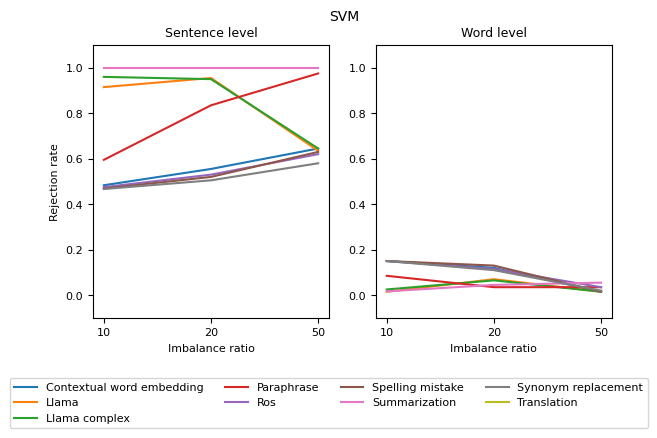

xai_rr_ratio_LSTM_Eraser.png


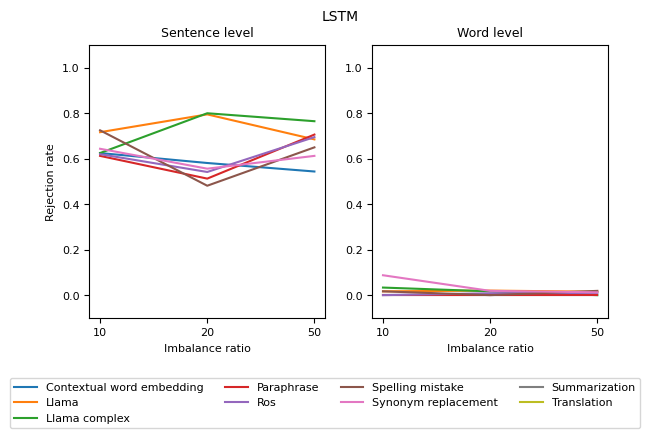

xai_rr_ratio_DistilBERT_Eraser.png


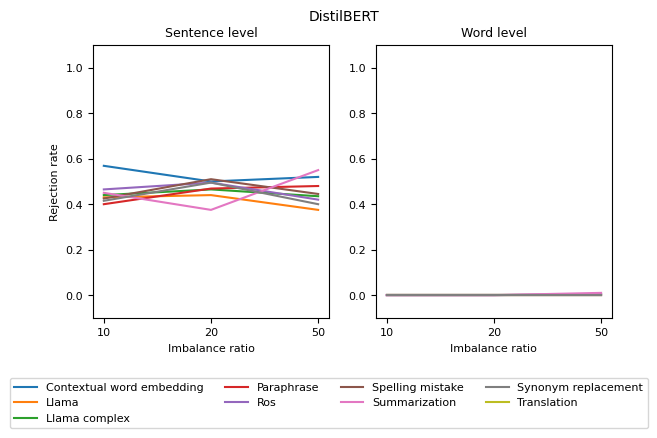

In [ ]:


for model_name in ["SVM", "LSTM", "DistilBERT"]:
    r1 = final_sentence[final_sentence["Model name"]==model_name]
    fig, ax=plt.subplots(1, 2, figsize=(17*cm, 9*cm))
    r = pd.concat([similarity_balancing_methods(r1[r1["Imbalance %"]==str(ratio)], pr=False)["rejection rate"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[0].plot(r[r.index == bal].values[0], label=bal)
    ax[0].legend(loc='upper center', bbox_to_anchor=(1, -0.2), ncol=4)
    ax[0].set_xticks([0,1,2],[10,20,50])
    ax[0].set_ylim(-0.1,1.1)
    ax[0].set_xlabel("Imbalance ratio")
    ax[0].set_ylabel("Rejection rate")
    ax[0].set_title("Sentence level", fontsize=9)

    r2 = final_word[final_word["Model name"]==model_name]
    r = pd.concat([similarity_balancing_methods(r2[r2["Imbalance %"]==str(ratio)], pr=False)["rejection rate"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[1].plot(r[r.index == bal].values[0], label=bal)
    ax[1].set_ylim(-0.1,1.1)
    ax[1].set_xticks([0,1,2],[10,20,50])
    ax[1].set_xlabel("Imbalance ratio")
    ax[1].set_title("Word level", fontsize=9)
    plt.suptitle(model_name, fontsize=10)
    print(fr"xai_rr_ratio_{model_name}_{task}.png")
    plt.savefig(fr"C:\Users\Maciek\Downloads\xai_rr_ratio_{model_name}_{task}.png", bbox_inches='tight')
    plt.show()

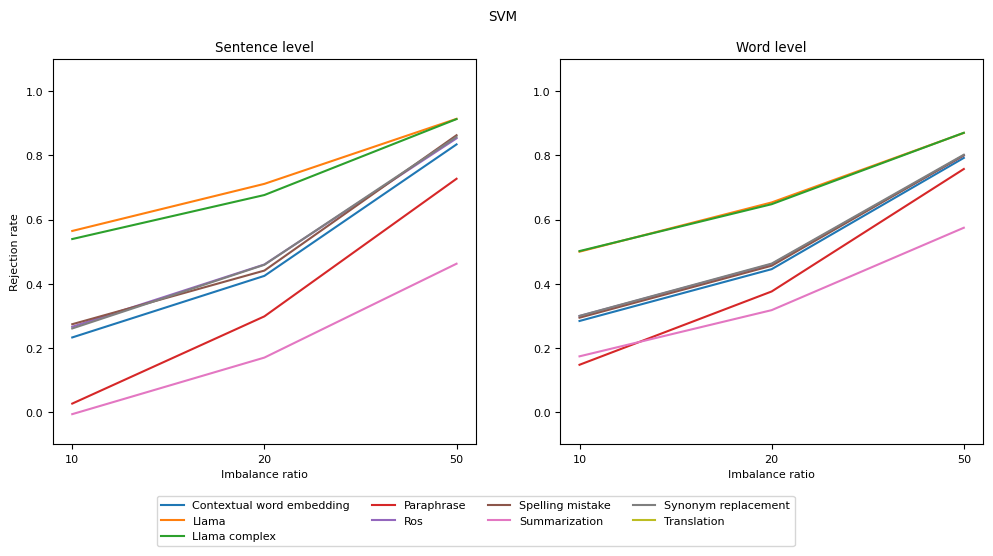

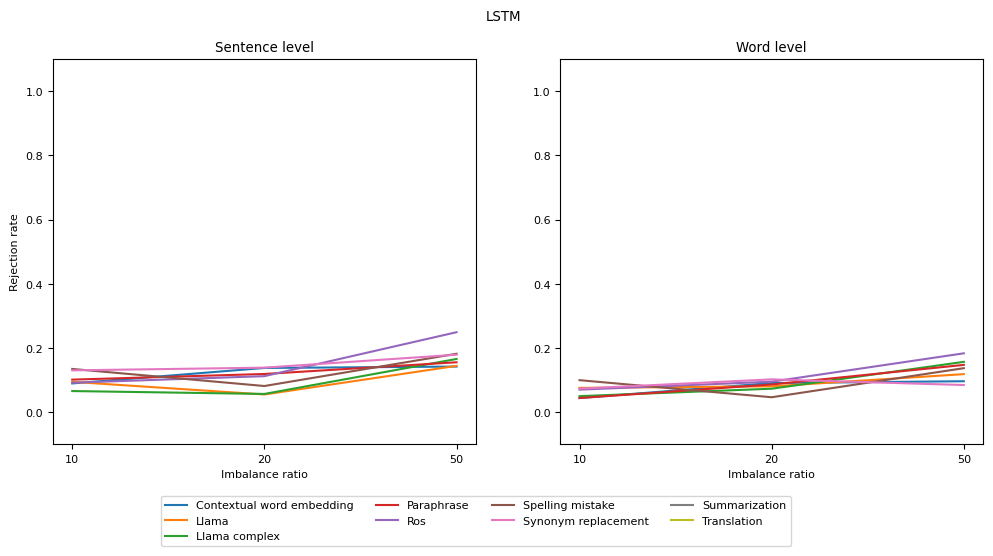

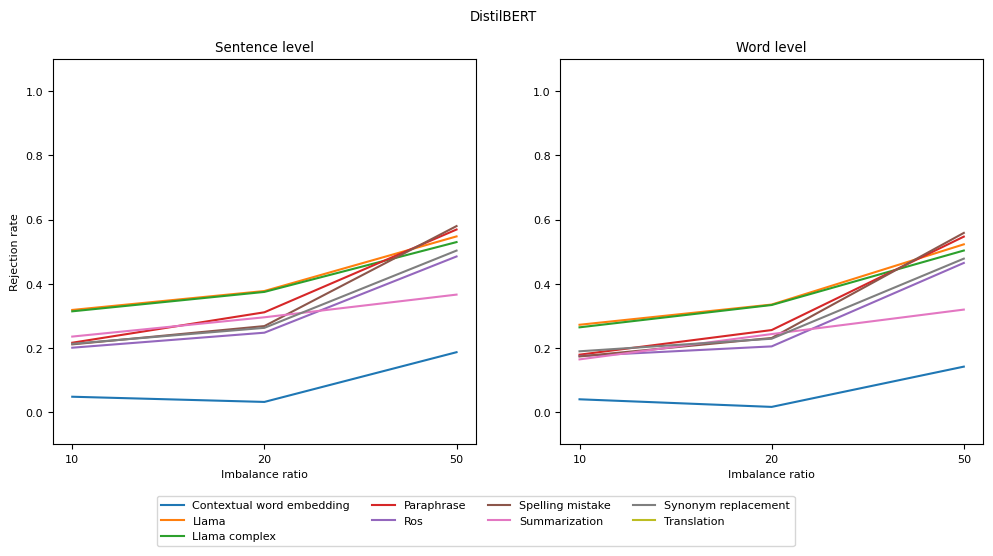

In [ ]:




for model_name in ["SVM", "LSTM", "DistilBERT"]:
    r1 = final_sentence[final_sentence["Model name"]==model_name]
    fig, ax=plt.subplots(1, 2, figsize=(12, 5))
    r = pd.concat([similarity_balancing_methods(r1[r1["Imbalance %"]==str(ratio)], pr=False, spearman = True)["mean"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[0].plot(r[r.index == bal].values[0], label=bal)
    ax[0].legend(loc='upper center', bbox_to_anchor=(1, -0.12), ncol=4)
    ax[0].set_xticks([0,1,2],[10,20,50])
    ax[0].set_ylim(-0.1,1.1)
    ax[0].set_xlabel("Imbalance ratio")
    ax[0].set_ylabel("Rejection rate")
    ax[0].set_title("Sentence level")

    r2 = final_word[final_word["Model name"]==model_name]
    r = pd.concat([similarity_balancing_methods(r2[r2["Imbalance %"]==str(ratio)], pr=False, spearman = True)["mean"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[1].plot(r[r.index == bal].values[0], label=bal)
    ax[1].set_ylim(-0.1,1.1)
    ax[1].set_xticks([0,1,2],[10,20,50])
    ax[1].set_xlabel("Imbalance ratio")
    ax[1].set_title("Word level")
    plt.suptitle(model_name)
    plt.show()

# Now what if we remove models that performed significantly worse than original model based on f1

xai_rr_ratio_SVM_Eraser.png


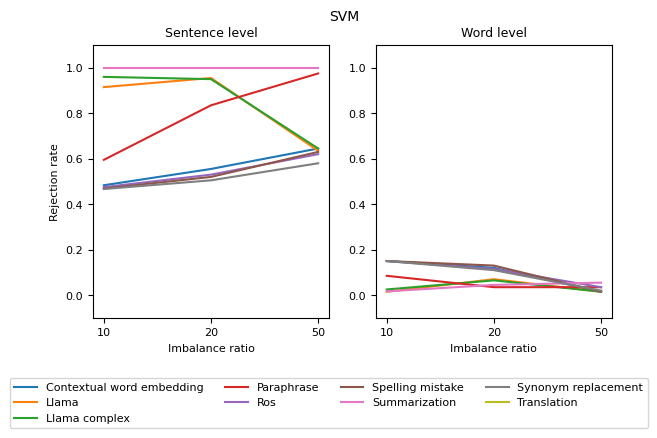

xai_rr_ratio_LSTM_Eraser.png


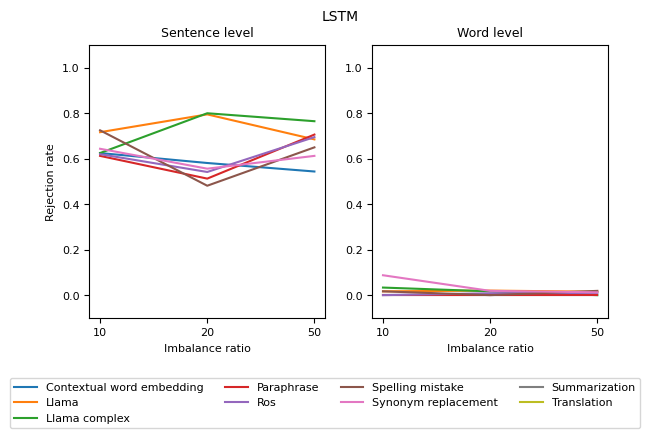

xai_rr_ratio_DistilBERT_Eraser.png


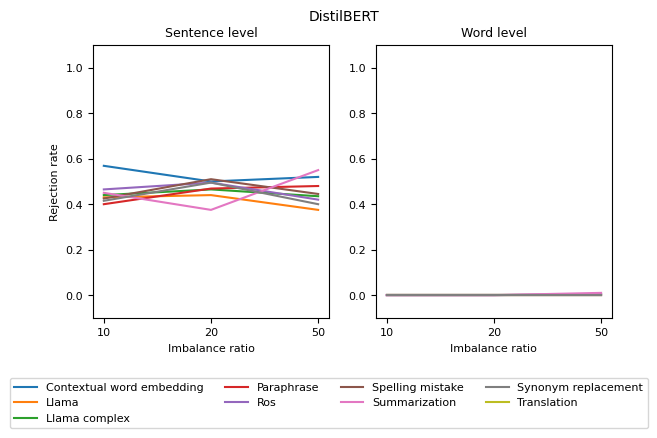

In [ ]:


for model_name in ["SVM", "LSTM", "DistilBERT"]:
    r1 = final_sentence[final_sentence["Model name"]==model_name]
    fig, ax=plt.subplots(1, 2, figsize=(17*cm, 9*cm))
    r = pd.concat([similarity_balancing_methods(r1[r1["Imbalance %"]==str(ratio)], pr=False)["rejection rate"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[0].plot(r[r.index == bal].values[0], label=bal)
    ax[0].legend(loc='upper center', bbox_to_anchor=(1, -0.2), ncol=4)
    ax[0].set_xticks([0,1,2],[10,20,50])
    ax[0].set_ylim(-0.1,1.1)
    ax[0].set_xlabel("Imbalance ratio")
    ax[0].set_ylabel("Rejection rate")
    ax[0].set_title("Sentence level", fontsize=9)

    r2 = final_word[final_word["Model name"]==model_name]
    r = pd.concat([similarity_balancing_methods(r2[r2["Imbalance %"]==str(ratio)], pr=False)["rejection rate"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[1].plot(r[r.index == bal].values[0], label=bal)
    ax[1].set_ylim(-0.1,1.1)
    ax[1].set_xticks([0,1,2],[10,20,50])
    ax[1].set_xlabel("Imbalance ratio")
    ax[1].set_title("Word level", fontsize=9)
    plt.suptitle(model_name, fontsize=10)
    print(fr"xai_rr_ratio_{model_name}_{task}.png")
    plt.savefig(fr"C:\Users\Maciek\Downloads\xai_rr_ratio_{model_name}_{task}.png", bbox_inches='tight')
    plt.show()

============================================== SVM ==============================================
F1 score of original model: 0.84
Threshold- 80% of F1 of original model: 0.67
This further removes 80 (60.2%) of remaining models


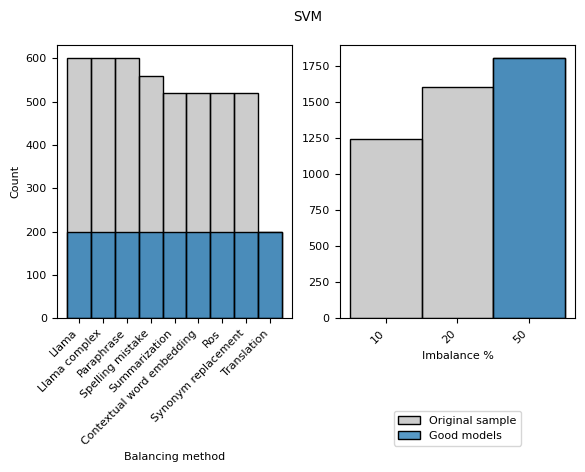

removal_of_bad_xai_SVM_Eraser.png
============================================== LSTM ==============================================
F1 score of original model: 0.26
Threshold- 80% of F1 of original model: 0.21
This further removes 41 (46.6%) of remaining models


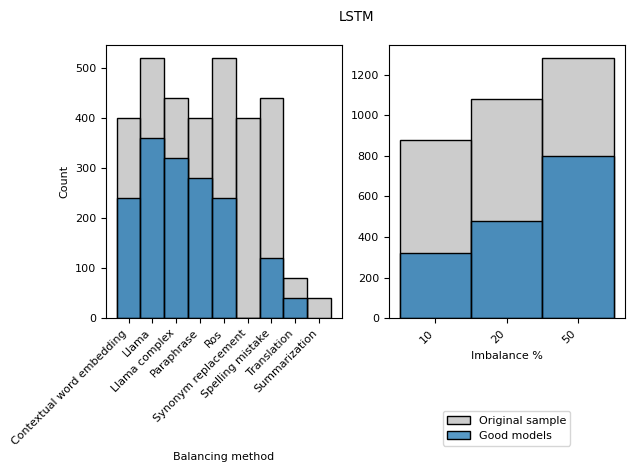

removal_of_bad_xai_LSTM_Eraser.png
============================================== DistilBERT ==============================================
F1 score of original model: 0.81
Threshold- 80% of F1 of original model: 0.65
This further removes 59 (49.6%) of remaining models


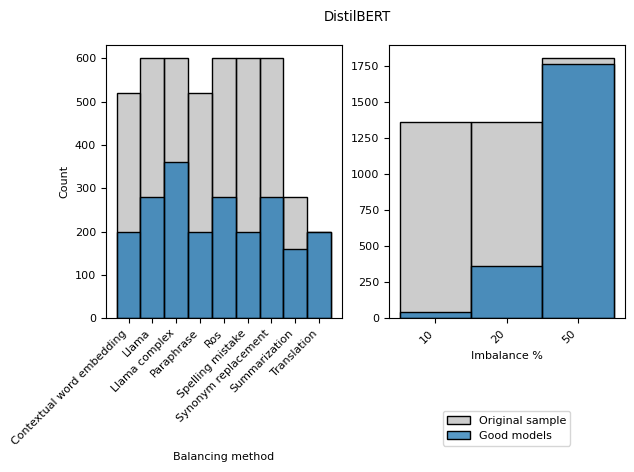

removal_of_bad_xai_DistilBERT_Eraser.png


In [ ]:
for model_name in ["SVM", "LSTM", "DistilBERT"]:
    print("============================================== "+model_name+" ==============================================")

    if task == "Amazon":
        metrics = pd.read_csv(f"amazon-review_{model_name}.csv")
    else:
        metrics = pd.read_csv(f"nlpaug_{model_name}.csv")

    # Getting f1 score of model trained on original data
    f1 = metrics[(metrics["Balancing method"]=="original")&(metrics["Model name"]==model_name)].f1.values[0]
    print(f"F1 score of original model: {np.round(f1, 2)}")
    # Calculating threshold
    threshold = np.round(f1*0.8, 2)
    print(f"Threshold- 80% of F1 of original model: {threshold}")
    metrics_temp = metrics[(metrics.auc>0.6) & (metrics.f1!=0)]
    print(f"This further removes {len(metrics_temp[metrics_temp.f1<threshold])} ({np.round(len(metrics_temp[metrics_temp.f1<threshold])/len(metrics_temp)*100,1)}%) of remaining models")
    final_word_tmp = final_word[final_word["Model name"]==model_name]



    fig, ax=plt.subplots(1, 2, figsize=(17*cm, 9*cm))

    for i,dimension in enumerate(["Balancing method", "Imbalance %"]):
        sns.histplot(final_word_tmp[dimension].astype(str),color="gray", alpha=.4, label="Original sample", ax=ax[i])
        metrics_temp = final_word_tmp[final_word_tmp.f1>=threshold]
        g=sns.histplot(metrics_temp[dimension].astype(str),label="Good models", ax=ax[i])
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")
    ax[1].set_ylabel("")

    plt.legend(ncol=1)
    plt.suptitle(model_name)
    sns.move_legend(g, "upper center", bbox_to_anchor=(1/2, -0.32))
    plt.savefig(out+"\\"+f"removal_of_bad_xai_{model_name}_{task}.png", bbox_inches='tight')
    plt.show()
    print(f"removal_of_bad_xai_{model_name}_{task}.png")

In [ ]:
display(final_word) 
metrics_temp

,Model ID,Imbalance %,Balancing method,id,original,spearman_original,normality_original,imbalanced,spearman_imbalanced,normality_imbalanced,...,Model name,acc,f1,precision,recall,mcc,auc,spearman,spearman_pval,loss
0,0,10,Llama,0,0.317496,0.356747,1.924945e-64,0.004339,0.521076,1.924945e-64,...,SVM,0.54,0.148148,1.000000,0.08,0.204124,0.7938,0.966570,5.248116e-06,NaN
1,0,10,Llama,1,0.864723,0.480500,1.954310e-44,0.004669,0.341592,1.954310e-44,...,SVM,0.54,0.148148,1.000000,0.08,0.204124,0.7938,0.966570,5.248116e-06,NaN
2,0,10,Llama,2,0.931978,0.538689,1.278540e-73,0.015432,0.538216,1.278540e-73,...,SVM,0.54,0.148148,1.000000,0.08,0.204124,0.7938,0.966570,5.248116e-06,NaN
3,0,10,Llama,3,0.011588,0.506306,3.462276e-40,0.000964,0.601589,3.462276e-40,...,SVM,0.54,0.148148,1.000000,0.08,0.204124,0.7938,0.966570,5.248116e-06,NaN
4,0,10,Llama,4,0.107886,0.588835,8.185020e-31,0.000324,0.639436,8.185020e-31,...,SVM,0.54,0.148148,1.000000,0.08,0.204124,0.7938,0.966570,5.248116e-06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4,50,Translation,35,0.759650,0.630301,3.997349e-90,0.430362,0.764678,3.997349e-90,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306
4596,4,50,Translation,36,0.643338,0.538444,1.133500e-54,0.306557,0.744259,1.133500e-54,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306
4597,4,50,Translation,37,0.643095,0.363941,3.378045e-51,0.145758,0.561861,3.378045e-51,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306
4598,4,50,Translation,38,0.832214,0.576140,1.375569e-60,0.431888,0.766185,1.375569e-60,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306


,Model ID,Imbalance %,Balancing method,id,original,spearman_original,normality_original,imbalanced,spearman_imbalanced,normality_imbalanced,...,Model name,acc,f1,precision,recall,mcc,auc,spearman,spearman_pval,loss
920,3,10,Llama complex,0,0.491833,0.267803,6.457641e-62,NaN,NaN,NaN,...,DistilBERT,0.74,0.666667,0.928571,0.52,0.534522,0.8726,0.945140,3.707957e-05,0.734893
921,3,10,Llama complex,1,0.859258,0.037847,5.360735e-40,NaN,NaN,NaN,...,DistilBERT,0.74,0.666667,0.928571,0.52,0.534522,0.8726,0.945140,3.707957e-05,0.734893
922,3,10,Llama complex,2,0.573121,0.184470,3.085327e-74,NaN,NaN,NaN,...,DistilBERT,0.74,0.666667,0.928571,0.52,0.534522,0.8726,0.945140,3.707957e-05,0.734893
923,3,10,Llama complex,3,0.579478,0.247745,3.209356e-37,NaN,NaN,NaN,...,DistilBERT,0.74,0.666667,0.928571,0.52,0.534522,0.8726,0.945140,3.707957e-05,0.734893
924,3,10,Llama complex,4,0.716228,0.312213,2.381202e-27,NaN,NaN,NaN,...,DistilBERT,0.74,0.666667,0.928571,0.52,0.534522,0.8726,0.945140,3.707957e-05,0.734893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4,50,Translation,35,0.759650,0.630301,3.997349e-90,0.430362,0.764678,3.997349e-90,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306
4596,4,50,Translation,36,0.643338,0.538444,1.133500e-54,0.306557,0.744259,1.133500e-54,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306
4597,4,50,Translation,37,0.643095,0.363941,3.378045e-51,0.145758,0.561861,3.378045e-51,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306
4598,4,50,Translation,38,0.832214,0.576140,1.375569e-60,0.431888,0.766185,1.375569e-60,...,DistilBERT,0.82,0.825243,0.801887,0.85,0.641155,0.9163,0.981726,4.773070e-07,0.378306


# Are balanced models more similar to original or imbalanced model?

### Sentence

In [ ]:
 def get_latex(results):
        results.reset_index(inplace=True)
        results = results[list(results.columns[1:3])+["index"]+list(results.columns[3:])]
        results = results.rename(columns={"index":"compared model"})
        l = results.reset_index(drop=True).astype(str).to_latex(index=False)
        l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", " ")
        l = "\\\\\hline\noriginal".join(l.split("\\\\\noriginal"))
        for mn in ["SVM", "LSTM", "DistilBERT"]:
            l = l.split(mn)[0]+"\hline\multirow{4}{*}{"+mn+"}"+" ".join(l.split(mn)[1:])
            
        l_tmp = l
        for level in ["sentence", "word"]:
            i=0
            for ls in l_tmp.split(level):
                if i==0:
                    l_tmp = ""
                if i%2==1:
                    l_tmp += "\multirow{2}{*}{"+level+"}"
                l_tmp += ls
                i+=1
                
        l = l_tmp.replace("& \multirow{2}{*}{word}","\cline{2-6} & \multirow{2}{*}{word}")
        print(l)

In [ ]:
# Method used to calculate descriptive statistics of p-values comparing XAI of balanced models to XAI of original and imbalanced models
def similarity_balanced_imbalanced(final_sentence, final_word, threshold = None, spearman=False, good=True):
    def get_similarity(final, threshold, spearman, good):
        # Filtering models if threshold was provided
        if 1-spearman:
            df_tmp = final[["original", "imbalanced", "f1"]].dropna()
        else:
            df_tmp = final[["spearman_original", "spearman_imbalanced", "f1"]].dropna()
        
        
        if threshold != None:
            df_tmp1 = df_tmp[df_tmp.f1>threshold]
            df_tmp1 = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean good": np.round(np.mean(df_tmp1, axis=0), 4),
                                "median good": np.round(np.median(df_tmp1, axis=0), 4),
                                "rejection rate good": np.round(np.mean(df_tmp1<0.05, axis=0), 4) })
            df_tmp = df_tmp[df_tmp.f1<=threshold]
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.concat([res,pd.DataFrame(data={"mean bad": np.round(np.mean(df_tmp, axis=0), 4),
                                "median bad": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate bad": np.round(np.mean(df_tmp<0.05, axis=0), 4) })], axis=1)
        else:
            # Calculating descriptive statistics
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                                "median": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) })
        if spearman and threshold==None:
            res=res.drop(["rejection rate"], axis=1)
        elif spearman:
            res=res.drop(["rejection rate good"], axis=1).drop(["rejection rate bad"], axis=1)
        
        return res
    
    def get_latex(res):
        res = res.reset_index()
        res = res[list(res.columns)[1:3]+["index"]+list(res.columns)[3:]]
        l=res.astype(str).to_latex(index=False)
        l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", r"\multirow{2}{*}{compared to}")
        l = "\\\\\hline\noriginal".join(l.split("\\\\\noriginal"))
        if "median good" in res.columns:
            l=l.split("\\\\")[0].replace("model","").replace("level",r"\multirow{2}{*}{level}").replace("mean good","").replace("median good","good models").replace("rejection rate good","").replace("mean bad","").replace("median bad","bad models").replace("rejection rate bad","")+"\\\\\n"+l.split("\\\\")[0].split("\hline\n")[1].replace("good","").replace("model","").replace("multirow{2}{*}{compared to}","").replace("bad","").replace("level","").replace("rejection rate bad","")+"\\\\".join(l.split("\\\\")[1:])
            l=l.replace(" \\hline"," \\\\\hline").replace("|lllllllll|","|lll|lll|lll|")
            
        for mn in ["SVM", "LSTM", "DistilBERT"]:
            l = l.split(mn)[0]+r"\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{"+mn+"}}"+" ".join(l.split(mn)[1:])
            
        l_tmp = l
        for level in ["sentence", "word"]:
            i=0
            for ls in l_tmp.split(level):
                if i==0:
                    l_tmp = ""
                if i%2==1:
                    l_tmp += "\multirow{2}{*}{"+level+"}"
                l_tmp += ls
                i+=1
        l = l_tmp.replace("& \multirow{2}{*}{word}","\cline{2-9} & \multirow{2}{*}{word}")
        print(l)
        
    result = []  
    for model_name in ["SVM", "LSTM", "DistilBERT"]:
        final_sentence_tmp = final_sentence[final_sentence["Model name"]==model_name]
        final_word_tmp = final_word[final_word["Model name"]==model_name] 
        res = pd.concat([get_similarity(final_sentence_tmp, threshold, spearman, good), get_similarity(final_word_tmp, threshold, spearman, good)])
        res["level"] = ["sentence", "sentence", "word", "word"]
        res["model"] = model_name
        res = res[["model", "level"]+list(res.columns)[:-2]]
        result.append(res)
        
    res = pd.concat(result)
    get_latex(res)
    display(res)

In [ ]:
similarity_balanced_imbalanced(final_sentence, final_word, threshold)


\begin{tabular}{|lll|lll|lll|}\hline
 & \multirow{2}{*}{level} & \multirow{2}{*}{compared to} &  & good models &  &  & bad models &  \\
 &  & \ & mean  & median  & rejection rate  & mean  & median  & rejection rate  \\\hline
\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{SVM}} & \multirow{2}{*}{sentence} & original & 0.103 & 0.0011 & 0.7276 & 0.1055 & 0.0019 & 0.7148 \\
  &  & imbalanced & 0.0805 & 0.0 & 0.789 & 0.085 & 0.0001 & 0.7715 \\
  \cline{2-9} & \multirow{2}{*}{word} & original & 0.4143 & 0.3726 & 0.0657 & 0.3745 & 0.2922 & 0.0856 \\
  &  & imbalanced & 0.336 & 0.2552 & 0.1856 & 0.3004 & 0.2239 & 0.2546 \\
\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{LSTM}} & \multirow{2}{*}{sentence} & original & 0.1539 & 0.0088 & 0.6234 & 0.1582 & 0.0102 & 0.6155 \\
  &  & imbalanced & 0.115 & 0.0011 & 0.7056 & 0.1112 & 0.0008 & 0.7086 \\
  \cline{2-9} & \multirow{2}{*}{word} & original & 0.5825 & 0.5904 & 0.0089 & 0.5852 & 0.5954 & 0.0095 \\
  &  & imbalanced & 0.6002 & 0.6271 & 0.0073 & 

,model,level,mean good,median good,rejection rate good,mean bad,median bad,rejection rate bad
original,SVM,sentence,0.1030,0.0011,0.7276,0.1055,0.0019,0.7148
imbalanced,SVM,sentence,0.0805,0.0000,0.7890,0.0850,0.0001,0.7715
original,SVM,word,0.4143,0.3726,0.0657,0.3745,0.2922,0.0856
imbalanced,SVM,word,0.3360,0.2552,0.1856,0.3004,0.2239,0.2546
original,LSTM,sentence,0.1539,0.0088,0.6234,0.1582,0.0102,0.6155
imbalanced,LSTM,sentence,0.1150,0.0011,0.7056,0.1112,0.0008,0.7086
original,LSTM,word,0.5825,0.5904,0.0089,0.5852,0.5954,0.0095
imbalanced,LSTM,word,0.6002,0.6271,0.0073,0.6010,0.6272,0.0069
original,DistilBERT,sentence,0.2210,0.0707,0.4606,0.1870,0.0205,0.6000
imbalanced,DistilBERT,sentence,0.2049,0.0452,0.5056,0.0854,0.0001,0.7250


### Spearman

In [ ]:
display(similarity_balanced_imbalanced(final_sentence, final_word, threshold, spearman = True))


\begin{tabular}{|lllllll|}\hline
 & \multirow{2}{*}{level} & \multirow{2}{*}{compared to} &  & good models &  & bad models \\
 &  & \ & mean  & median  & mean  & median  \\\hline
\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{SVM}} & \multirow{2}{*}{sentence} & spearman\_original & 0.5322 & 0.5376 & 0.3835 & 0.4071 \\
  &  & spearman\_imbalanced & 0.5504 & 0.5738 & 0.4275 & 0.4579 \\
  \cline{2-9} & \multirow{2}{*}{word} & spearman\_original & 0.5477 & 0.5524 & 0.4115 & 0.4205 \\
  &  & spearman\_imbalanced & 0.5674 & 0.5881 & 0.4554 & 0.4834 \\
\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{LSTM}} & \multirow{2}{*}{sentence} & spearman\_original & 0.1514 & 0.1581 & 0.1586 & 0.164 \\
  &  & spearman\_imbalanced & 0.3583 & 0.3678 & 0.3548 & 0.3616 \\
  \cline{2-9} & \multirow{2}{*}{word} & spearman\_original & 0.1163 & 0.1076 & 0.1192 & 0.1099 \\
  &  & spearman\_imbalanced & 0.3242 & 0.3181 & 0.3271 & 0.3199 \\
\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{DistilBERT}} & \multirow{2}{

,model,level,mean good,median good,mean bad,median bad
spearman_original,SVM,sentence,0.5322,0.5376,0.3835,0.4071
spearman_imbalanced,SVM,sentence,0.5504,0.5738,0.4275,0.4579
spearman_original,SVM,word,0.5477,0.5524,0.4115,0.4205
spearman_imbalanced,SVM,word,0.5674,0.5881,0.4554,0.4834
spearman_original,LSTM,sentence,0.1514,0.1581,0.1586,0.1640
spearman_imbalanced,LSTM,sentence,0.3583,0.3678,0.3548,0.3616
spearman_original,LSTM,word,0.1163,0.1076,0.1192,0.1099
spearman_imbalanced,LSTM,word,0.3242,0.3181,0.3271,0.3199
spearman_original,DistilBERT,sentence,0.4642,0.4861,0.2602,0.2186
spearman_imbalanced,DistilBERT,sentence,0.5254,0.5559,0.3144,0.3114


None

# Which method results in models the most similar to original model?

In [ ]:
print("Sentence")
display(similarity_balancing_methods(final_sentence, threshold))
print("Word")
similarity_balancing_methods(final_word, threshold)

Sentence


,mean good,median good,rejection rate good,mean bad,median bad,rejection rate bad
Balancing method,,,,,,
Contextual word embedding,0.1616,0.0224,0.5825,0.1801,0.0324,0.5481
Llama,0.1940,0.0335,0.5375,0.1096,0.0005,0.7164
Llama complex,0.1915,0.0409,0.5196,0.1017,0.0004,0.7519
Paraphrase,0.0963,0.0006,0.7275,0.1459,0.0167,0.5973
Ros,0.2022,0.0377,0.5375,0.1824,0.0297,0.5463
Spelling mistake,0.1823,0.0351,0.5375,0.1922,0.0374,0.5283
Summarization,0.0747,0.0000,0.7944,0.0608,0.0000,0.8562
Synonym replacement,0.2142,0.0546,0.4886,0.1898,0.0393,0.5194
Translation,0.0999,0.0000,0.7614,0.0743,0.0000,0.8250


Word


,mean good,median good,rejection rate good,mean bad,median bad,rejection rate bad
Balancing method,,,,,,
Contextual word embedding,0.5113,0.5133,0.0075,0.5364,0.5748,0.0404
Llama,0.6146,0.6303,0.0071,0.5684,0.5809,0.0216
Llama complex,0.6215,0.6341,0.0054,0.5652,0.5801,0.0222
Paraphrase,0.6331,0.6639,0.0175,0.5211,0.5407,0.0214
Ros,0.5808,0.6109,0.0143,0.5150,0.5402,0.0407
Spelling mistake,0.5956,0.6307,0.0075,0.4855,0.4891,0.0458
Summarization,0.4768,0.4617,0.0361,0.5906,0.6063,0.0250
Synonym replacement,0.5767,0.6125,0.0091,0.4859,0.4926,0.0537
Translation,0.4620,0.4399,0.0591,0.6649,0.7550,0.0000


### Spearman

In [ ]:
print("Sentence")
display(similarity_balancing_methods(final_sentence, threshold, spearman = True))
print("Word")
similarity_balancing_methods(final_word, threshold, spearman = True)

Sentence


,mean good,median good,mean bad,median bad
Balancing method,,,,
Contextual word embedding,0.5107,0.5636,0.1708,0.1448
Llama,0.5924,0.6332,0.3504,0.3472
Llama complex,0.6241,0.6135,0.3409,0.3438
Paraphrase,0.6484,0.6515,0.1799,0.1854
Ros,0.5430,0.5658,0.2399,0.2289
Spelling mistake,0.7216,0.7768,0.2386,0.2311
Summarization,0.4317,0.4333,0.1388,0.1460
Synonym replacement,0.6442,0.6987,0.2450,0.2308
Translation,0.4065,0.4324,0.1684,0.1941


Word


,mean good,median good,mean bad,median bad
Balancing method,,,,
Contextual word embedding,0.4672,0.4364,0.1594,0.1060
Llama,0.5653,0.5964,0.3132,0.2775
Llama complex,0.5865,0.5749,0.3170,0.2918
Paraphrase,0.6525,0.6695,0.1922,0.1802
Ros,0.5060,0.5192,0.2185,0.1947
Spelling mistake,0.6796,0.7077,0.2172,0.1982
Summarization,0.4755,0.4924,0.2314,0.2341
Synonym replacement,0.6049,0.6657,0.2196,0.2050
Translation,0.4470,0.4887,0.2445,0.2341


### Is XAI correlated with other model evaluation dimensions?

,Unnamed: 0,model,id,words_sentence,lime_sentence,words_word,lime_word
0,0,amazon_review_50_imbalanced_3_SVM.obj,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-0.003793765830207563, -0.0016514947194475448...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[-0.0013365187856096627, -0.001943402772433773..."
1,1,amazon_review_50_imbalanced_3_SVM.obj,1,"['I', 'd', 'give', 'it', '6', 'stars', 'if', '...","[-0.00925297314576525, -0.008984065730127598, ...",['1' '100' '2' '3' '4' '5' '6' '7' 'And' 'Andr...,"[-0.008653353612176824, 0.0009080727006301128,..."
2,2,amazon_review_50_imbalanced_3_SVM.obj,2,"['Very', 'good', 'bang', 'for', 'your', 'buck'...","[0.026781618055836766, 0.04490728735278903, 0....",['24' '3' '7' 'Another' 'As' 'Go' 'Hope' 'I' '...,"[0.03058485747864986, -0.008722407106490073, -..."
3,3,amazon_review_50_imbalanced_3_SVM.obj,3,"['To', 'learn', 'on', 'it', 'is', 'great', 'I'...","[-0.021977011097483852, 0.0008823057263826397,...",['2' '4GB' '8' 'After' 'I' 'In' 'It' 'Overall'...,"[-0.0008210919692663685, 0.0001790269463376758..."
4,4,amazon_review_50_imbalanced_3_SVM.obj,4,"['to', 'kyros', 'or', 'not', 'to', 'kyros', 'f...","[-0.0868586550095909, 0.032482789098436216, -0...",['5' 'american' 'and' 'bad' 'battery' 'being' ...,"[0.005442515418285386, 0.018928624310060222, 0..."
...,...,...,...,...,...,...,...
15715,5555,amazon_review_10_imbalanced_4_DistilBERT.obj,35,"['iGod', 'I', 'have', 'difficulty', 'with', 'm...","[-0.025105207478321137, 0.005711591151787516, ...",['2' 'I' 'Many' 'There' 'When' 'a' 'allow' 'am...,"[-0.011342556543908998, 0.005711591151787516, ..."
15716,5556,amazon_review_10_imbalanced_4_DistilBERT.obj,36,"['iPad', 'pood', 'This', 'is', 'not', 'worth',...","[0.006756197293408051, 0.0010421791294419132, ...",['For' 'I' 'If' 'In' 'It' 'O' 'Oh' 'This' 'Yes...,"[-0.003610300307569808, 0.002620818236539065, ..."
15717,5557,amazon_review_10_imbalanced_4_DistilBERT.obj,37,"['Cruz', 'T301', 'is', 'worth', 'checking', 'o...","[0.04835314642340072, -0.008084273160322324, -...",['16' '1Market' '2' '24' '3' '32' '8' '99' 'A'...,"[-0.016552075190659595, -0.00881095233493245, ..."
15718,5558,amazon_review_10_imbalanced_4_DistilBERT.obj,38,"['Don', 't', 'Hesitate', 'to', 'Buy', 'I', 'di...","[0.030793532382375796, 0.030627337427602083, 0...",['18' 'AYL' 'Amazon' 'Android' 'As' 'Asus' 'Bl...,"[-0.00020349468557982303, 0.006335722085845123..."


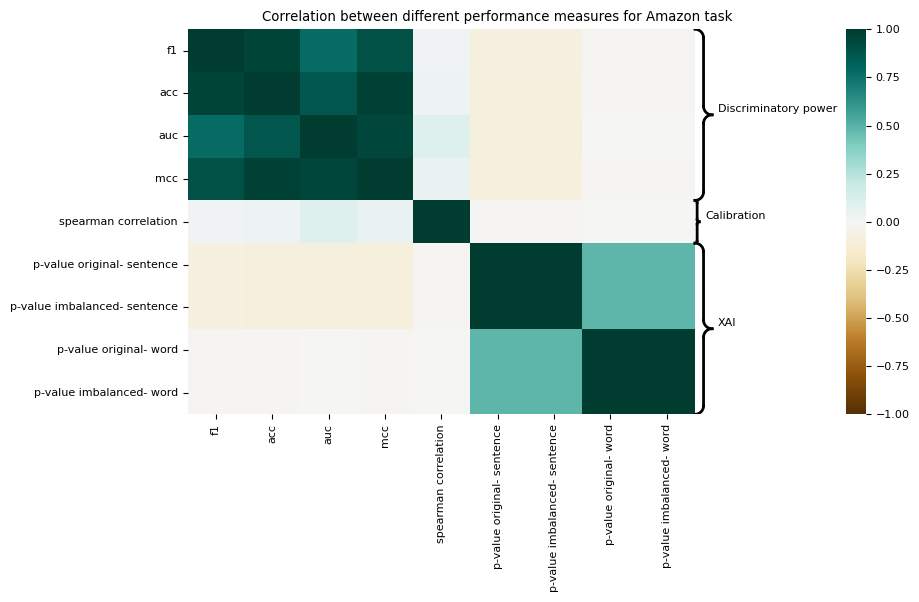

,Unnamed: 0.1,Unnamed: 0,model,id,words_sentence,lime_sentence,words_word,lime_word
0,0,0,eraser_movie_20_imbalanced_1_SVM.obj,0,"['there', 'may', 'not', 'be', 'a', 'critic', '...","[-0.0023510436284893874, -0.001149116990255253...",['a' 'about' 'accidental' 'act' 'action' 'affe...,"[0.0008153790846635893, -0.0001337514776326615..."
1,1,1,eraser_movie_20_imbalanced_1_SVM.obj,1,"['renee', 'zellweger', 'stars', 'as', 'sonia',...","[-0.0008797237142304188, 0.0008984306385663214...",['1991' '1997' '21' 'a' 'about' 'acting' 'adeq...,"[-0.0013887081663881433, 0.0029263515487032345..."
2,2,2,eraser_movie_20_imbalanced_1_SVM.obj,2,"['there', 're', 'so', 'many', 'things', 'to', ...","[-0.01756281249605644, -0.0013797640438211855,...",['20' '3' '4' '99' 'a' 'about' 'acting' 'actua...,"[0.007120218003259248, -0.007146497366048108, ..."
3,3,3,eraser_movie_20_imbalanced_1_SVM.obj,3,"['do', 'n', 't', 'let', 'this', 'movie', 'fool...","[-0.02486473749378378, -0.002608375949646954, ...",['a' 'about' 'accolade' 'achievement' 'again' ...,"[0.0028418046373063187, -0.0036055113211421476..."
4,4,4,eraser_movie_20_imbalanced_1_SVM.obj,4,"['it', 's', 'a', 'good', 'thing', 'most', 'ani...","[-0.0016676413159903399, -2.265893067244543e-0...",['31st' 'a' 'about' 'action' 'aliens' 'all' 'a...,"[-0.0045547639473927995, 0.0005126824509492028..."
...,...,...,...,...,...,...,...,...
13835,1595,1595,eraser_movie_10_Contextual_word_embedding_3_Di...,35,"['the', 'plot', 'of', 'big', 'momma', 's', 'ho...","[-0.029835558249404176, -0.041857015914193385,...",['90' '_' '_and' 'a' 'about' 'absolutely' 'acc...,"[-0.020796777246296694, -0.0144997436856854, 0..."
13836,1596,1596,eraser_movie_10_Contextual_word_embedding_3_Di...,36,"['starring', 'william', 'baldwin', 'cindy', 'c...","[0.04080479710871758, -0.022547427839991706, 0...",['a' 'ability' 'about' 'acted' 'acting' 'actor...,"[0.046588454637025906, 0.04822721028970748, 0...."
13837,1597,1597,eraser_movie_10_Contextual_word_embedding_3_Di...,37,"['take', 'a', 'look', 'at', 'the', 'following'...","[0.00826998838368842, -0.02240867720370128, -0...",['1' '20' '25' 'a' 'academy3' 'actors' 'allen'...,"[0.04033952731447936, -0.001563022358366624, 0..."
13838,1598,1598,eraser_movie_10_Contextual_word_embedding_3_Di...,38,"['synopsis', 'a', 'maniac', 'crazed', 'by', 'v...","[-0.03918655046479479, 0.011104326074841684, 0...",['2007' '76' 'a' 'abandoned' 'able' 'about' 'a...,"[-0.0450886705264764, -0.05509696744775729, 0...."


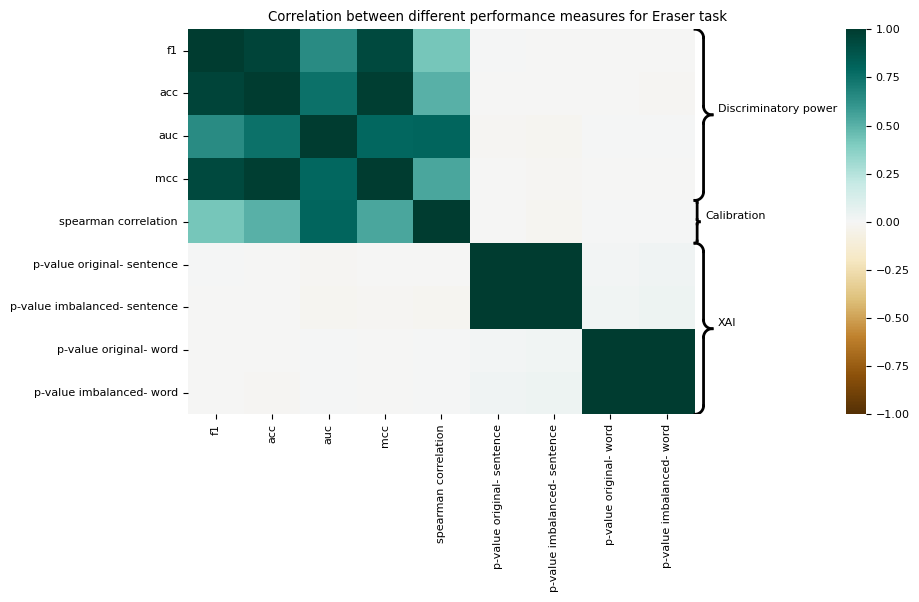

In [ ]:
from curlyBrace import curlyBrace

# Method used to preprocess the dataset and get p_values for all models
def preprocess_dataset2(df, task):
       
    # Adding additionall columns based on model name
    name = pd.DataFrame(list(df["model"].map(lambda x:get_method_and_percentage(x))))
    name.columns = ["Balancing method", "Imbalance %", "Model name", "Model ID"]
    name["Balancing method"] = name["Balancing method"].apply(lambda x: x[0].upper() + x[1:].lower().replace("_"," ")) # Capitalizing balancing method
    df = pd.concat([name, df[df.columns[2:]]], axis=1)
    df = df.sort_values(["id", "Imbalance %", "Model ID", "Balancing method", "Model name"])
    df.columns = [str(col).replace("eval_", "") for col in df.columns]
        
        
    final_sentence = []
    final_word = []
    for mn in ["SVM", "LSTM", "DistilBERT"]:
        if task == "Amazon":
            metrics = pd.read_csv(f"amazon-review_{mn}.csv")
        else:
            metrics = pd.read_csv(f"nlpaug_{mn}.csv")
        df_tmp = df[df["Model name"]==mn]
        
        # Filtering out models that were not supposed to be in the dataset
        df_tmp = df_tmp[df_tmp["Balancing method"]!="Amazon review"]
        results_sentence = get_p_values(df_tmp, lime="lime_sentence")
        results_word = get_p_values(df_tmp, lime="lime_word")
        final_sentence.append(add_metrics(results_sentence, metrics[metrics["Model name"]==mn]))
        final_word.append(add_metrics(results_word, metrics[metrics["Model name"]==mn]))
    
    return pd.concat(final_sentence), pd.concat(final_word)

def plot_results(final, save=True):
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))


    plot_data = final[["f1", "acc", "auc", "mcc", "spearman", "normality_original", "normality_imbalanced", "normality_original_word", "normality_imbalanced_word"]]
    plot_data.columns = ["f1", "acc", "auc", "mcc", "spearman correlation", "p-value original- sentence", "p-value imbalanced- sentence", "p-value original- word", "p-value imbalanced- word"]
    sns.heatmap(plot_data.corr(), cmap='BrBG', vmin=-1, vmax=1)


    k_r1 = 0.05
    plt.xlim(0,11)
    plt.plot(20000,1, color='red', lw=1)
    curlyBrace(fig, axes, [9, 4], [9, 0.0], k_r1, bool_auto=True, str_text="Discriminatory power", color='black', lw=2, int_line_num=1)
    curlyBrace(fig, axes, [9, 5], [9, 4], k_r1, bool_auto=True, str_text="Calibration", color='black', lw=2, int_line_num=1)
    curlyBrace(fig, axes, [9, 9], [9, 5], k_r1, bool_auto=True, str_text="XAI", color='black', lw=2, int_line_num=1)
    plt.title(f"Correlation between different performance measures for {task} task")
    if save:
        plt.savefig(fr"C:\Users\Maciek\Downloads\correlation_dimension_{task}.png", bbox_inches='tight')
    plt.show()
    

    
for task in ["Amazon", "Eraser"]:
    final = []
    
    if task == "Amazon":
        path = r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_amazon_"
    else:
        path = r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_final_"
    
    df = pd.concat([pd.read_csv(path+f"{model}.csv") for model in ["SVM", "LSTM", "DistilBERT"]])
    df.reset_index(drop=True, inplace=True)
    display(df)



    final_sentence_tmp, final_word_tmp = preprocess_dataset2(df, task)
    final_word_tmp = final_word_tmp[["normality_original", "normality_imbalanced"]]
    final_word_tmp.columns = ["normality_original_word", "normality_imbalanced_word"]

    final = final_sentence_tmp.join(final_word_tmp)
    plot_results(final)
    
    
    
    
    